## Modelling and Diferential Equation Solving


Homework Guidelines:

1) Document your code! Only part of your score on the homework will be if you get the "right" answer. In order for us to understand what you've written, you need to have clearly written code. Documenting your code with comments (# sign) and spacing out your code (but not too much) makes it easier to read. You should also make use of the markdown feature of ipython notebooks for longer explanations or to imbed pictures/formulas.

2) You may google around for tools for solving the homework problems (StackExchange will often pop up!) but DO NOT google the exact problem statement or copy blocks of code from elsewhere.

3) You can work in small groups to complete assignments and share code within the small group. Please specify who you worked with if your submitted solutions are similar/identical.

4) Various python packages have built in routines for common programming tasks. If you want to use an external (i.e. import X) package which isn't imported in the problem statement please ask the instructor first.

5) Some problem statements might be vague or unspecific (like "Explore the relationship between X and Y"), just like real research questions! When in doubt it would be useful to provide plots and your observations. Show what you did graphically whenever possible.

6) Run all cells before you commit!


<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

## Problem 1 - Monte Carlo Integration (10 Points)

Our first example of Monte Carlo technique in class was used to integrate a circle, in this exercise we will Monte Carlo a few more complex shapes...

a) Find the volume of the intersection of a sphere and a cylinder. The sphere has radius 1 and is centered at
the origin. The cylinder has radius 0.5, and its axis is perpendicular
to the x axis and goes through the point ( 0.5, 0, 0).  (The red region of the below shape.)

In [1]:
import numpy as np
#sampling (x_points, y_points, z_points) 
n = 10000
x_points = -1 + 2 * np.random.random(n)
y_points = -1 + 2 * np.random.random(n)
z_points = -1 + 2 * np.random.random(n)


#calculate the points inside
n_inside = np.sum((x_points-0.5)**2 + y_points**2 < 0.5**2)
print("Volume is "+str((4*np.pi/3) * n_inside / n))

Volume is 0.8000589291142006


<html>
<img src="./problem1.png",width=300,height=300>
</html>

b) The volume of a unit circle is $\pi$ and the volume of a unit sphere is $\frac{4}{3}\pi$. What is the volume of a unit 6 dimensional sphere?

In [2]:
#sampling (x1_points, x2_points, x3_points, x4_points, x5_points, x6_points) 
n = 10000
x1_points = -1/2 + np.random.random(n)
x2_points = -1/2 + np.random.random(n)
x3_points = -1/2 + np.random.random(n)
x4_points = -1/2 + np.random.random(n)
x5_points = -1/2 + np.random.random(n)
x6_points = -1/2 + np.random.random(n)

#let us make a model: a box with six dimension ranged in the area of (-1,1)**6 and a six dimensional sphere
# now calculate the points inside
n_inside = np.sum(x1_points**2 + x2_points**2 + x3_points**2 + x4_points**2 + x5_points**2 + x6_points**2  < 1)
print("Volume is "+str(n_inside / n))

Volume is 0.9951


## Problem 2 - Nonlinear Pendulum (10 points)

The equation of motion for a point mass at the end of a massless and frictionless arm attached to a frictionless pivot can be written as

$$\frac{d^2\theta}{dt^2} = - \frac{g}{l} \sin(\theta)$$

Note that in your introductory physics class you mighth have solved this in the small $\theta$ limit where $\sin(\theta) \approx \theta$. In this case we will do the full wide angle solution.


a) Code up the solution to the nonlinear pendulum using odeint. Note you will have to use the trick mentioned in class of breaking up the second order equation into two first order equations. 

You can take the initial position as $\pi/3$, initial velocity as 0.01 meters/second, g as 9.8 meters/second^2, and the arm length as 1 meter.

In [3]:
import numpy as np
from scipy.integrate import odeint

def pendulum(y, t):
    theta, w = y 
    return [w, -9.8 * np.sin(theta)]

y0 = [np.pi/3, 0.01]  # initial points

t= np.linspace(0, 10, 100)   # independent variable
sol = odeint(pendulum, y0, t)

b) Plot the solution between t = 0 and t = 10 seconds.

Populating the interactive namespace from numpy and matplotlib


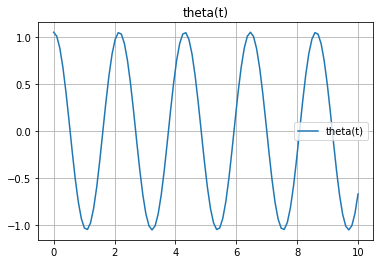

In [4]:
%pylab inline
plt.plot(t, sol[:,0], label="theta(t)")
plt.title("theta(t)")
plt.grid()
plt.legend(loc = "best")

## Problem 3 - Trajectory with Air Resistance (15 points)

(From Nick Kern)

Consider a spherical cannonball shot from a cannon standing level with the ground. The trajectory without air resistance can be solved by-hand and resembles a parabola, using the equations of motion:

\begin{align}
\frac{dx}{dt} &= v_{x,0}\\
\\
\frac{d^{2}y}{dt^{2}} &= -g\\
\\
\frac{dy}{dt} &= \frac{d^2y}{dt^2}t + v_{y,0}
\end{align}

If we include air resistance, this changes. The force of air resistance can be written as

\begin{align}
F = \tfrac{1}{2}\pi R^2\rho C v^2
\end{align}

where $R$ is the sphere's radius, $\rho$ is the density of air, $v$ is the ball's velocity and $C$ is the coefficient of drag. Incorporating these into Newton's laws gives us equations of motion given as

\begin{align}
\ddot{x} &= -\frac{\pi R^2\rho C}{2m}\dot{x}\sqrt{\dot{x}^2+\dot{y}^2}\\
\\
\ddot{y} &= -g - \frac{\pi R^2\rho C}{2m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}
\end{align}

where $m$ is the mass of the ball, $g$ is the gravitational acceleration and $\dot{x}$ and $\ddot{x}$ are the first and second derivatives with respect to time.


a) Use odeint to solve the trajectory of $x(t)$ and $y(t)$ assuming $m = 1$ kg, $R = 0.08$ meters, the initial velocity is 100 meters sec$^{-1}$, the firing angle is $30^\circ$, the density of air is $\rho=1.22$kg m$^{-3}$, and the drag of a sphere has $C = 0.47$. 


In [5]:
from scipy.integrate import odeint
import numpy as np

# initial values
m = 1; R = 0.08; density = 1.22; C = 0.47; g= 9.8
v0 = 100
theta0 = np.pi/6
w0 = [0, v0 * np.cos(theta0), 0, v0 * np.sin(theta0)]

# v and u resemble the first order of x and y
def func(w, t):
    x, v, y, u = w
    f = [v, 
         ((-np.pi*R**2*density*C)/(2*m)) * v * np.sqrt(v**2+u**2),
         u,
         -g - ((-np.pi*R**2*density*C)/(2*m)) * u * np.sqrt(v**2+u**2)]
    return f
    
t = np.linspace(0, 3.5, 100)
sol = odeint(func, w0, t)    # solve the coupled sysytems of equation

b) Plot the trajectory of $y(x)$. Does it look parabolic? Re-do the calculation with $C = 0.001$ and overplot that trajectory of $y(x)$ overtop. Does a sphere with air resistance travel farther or shorter than a sphere with no air resistance?


Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'y(x)')

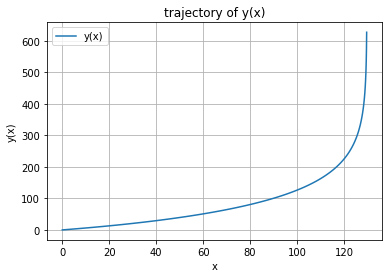

In [6]:
%pylab inline

# plot when C is 0.47
plt.plot(sol[:,0], sol[:,2],label="y(x)")
plt.title("trajectory of y(x)")
plt.grid()
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y(x)")

In [7]:
from scipy.integrate import odeint
import numpy as np

# initial values
m = 1; R = 0.08; density = 1.22; C = 0.001; g= 9.8
v0 = 100
theta0 = np.pi/6
w0 = [0, 50 * np.sqrt(3), 0, 50]

# v and u resemble the first order of x and y
def func(w, t):
    x, v, y, u = w
    f = [v, 
         ((-np.pi*R**2*density*C)/(2*m)) * v * np.sqrt(v**2+u**2),
         u,
         -g - ((-np.pi*R**2*density*C)/(2*m)) * u * np.sqrt(v**2+u**2)]
    return f
    
t = np.linspace(0, 10, 100)
sol = odeint(func, w0, t)    # solve the coupled sysytems of equation

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'y(x)')

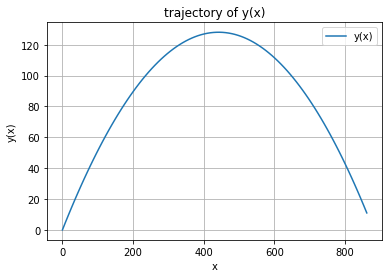

In [8]:
%pylab inline

# plot when C is 0.001
plt.plot(sol[:,0], sol[:,2],label="y(x)")
plt.title("trajectory of y(x)")
plt.grid()
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y(x)")

In [9]:
print(" Apparently, a sphere with air resistance travel shorter than a sphere with no air resistance")

 Apparently, a sphere with air resistance travel shorter than a sphere with no air resistance


c) Use an optimization method to figure out the best launch angle in order to travel the farthest distance, holding all other parameters fixed. You can choose your favorite method (first order, second order, anything in scipy.optimize, etc.)


In [10]:
#  a sphere with air resistance
from scipy.integrate import odeint
import numpy as np

# initial values
m = 1; R = 0.08; density = 1.22; C = 0.47; g= 9.8
v0 = 100
theta0 = np.pi/6
w0 = [0, 50 * np.sqrt(3), 0, 50]

# v and u resemble the first order of x and y
def func(w, t):
    x, v, y, u = w
    f = [v, 
         ((-np.pi*R**2*density*C)/(2*m)) * v * np.sqrt(v**2+u**2),
         u,
         -g - ((-np.pi*R**2*density*C)/(2*m)) * u * np.sqrt(v**2+u**2)]
    return f
    
t = np.linspace(0, 3.5, 100)
sol = odeint(func, w0, t)    # solve the coupled sysytems of equation

sol[:,2][o]= 0


NameError: name 'o' is not defined

In [ ]:
# a sphere without air resistance

# initial values
m = 1; R = 0.08; density = 1.22; C = 0.001; g= 9.8
v0 = 100
theta0 = np.pi/6
w0 = [0, 50 * np.sqrt(3), 0, 50]

# v and u resemble the first order of x and y
def func(w, t):
    x, v, y, u = w
    f = [v, 
         ((-np.pi*R**2*density*C)/(2*m)) * v * np.sqrt(v**2+u**2),
         u,
         -g - ((-np.pi*R**2*density*C)/(2*m)) * u * np.sqrt(v**2+u**2)]
    return f
    
t = np.linspace(0, 10, 100)
sol = odeint(func, w0, t)    # solve the coupled sysytems of equation



## Problem 4 - California Housing (15 Points)

Lets continue our exploration of the California Housing Data we used in class... Remember we need to do the following to load the dataset.

In [11]:
from sklearn import datasets
data = datasets.california_housing.fetch_california_housing()

In [12]:
print(data["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

a) Plot the home price vs each variale and perform a simple linear regression against each one. Which variable seems most important in determining home prices? Why?

(Note, it might be easier to use numpy or scipy instead of sklearn for this one.

Populating the interactive namespace from numpy and matplotlib


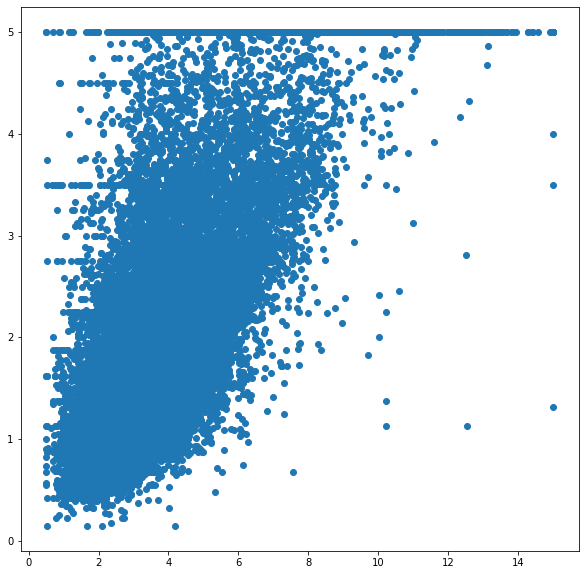

slope is 0.4179384920189621                       intercept is 0.4508557670326816


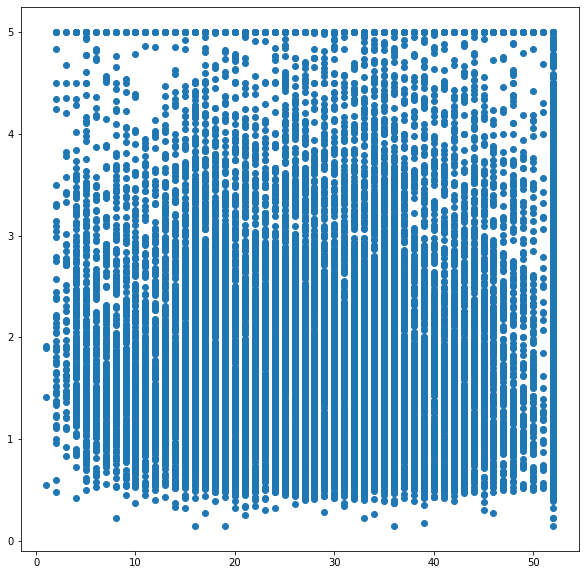

slope is 0.009684496397427559                       intercept is 1.7911991658938475


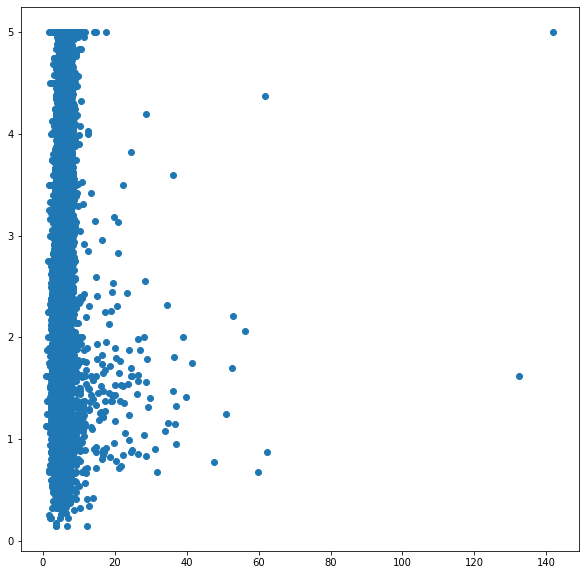

slope is 0.07086879328040556                       intercept is 1.6838115086404821


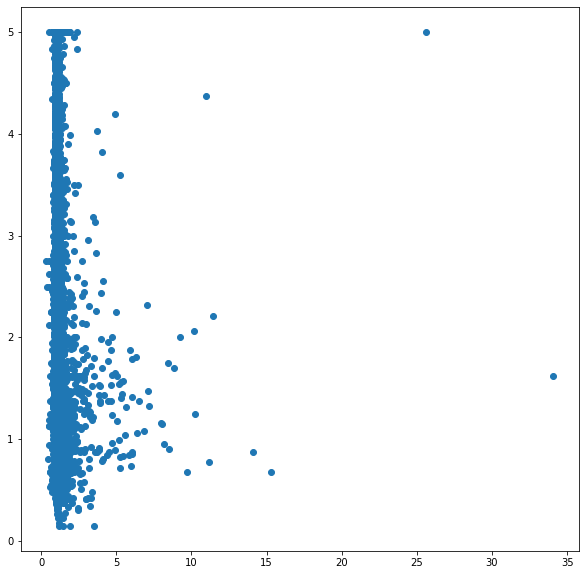

slope is -0.11371409577330761                       intercept is 2.193265592083674


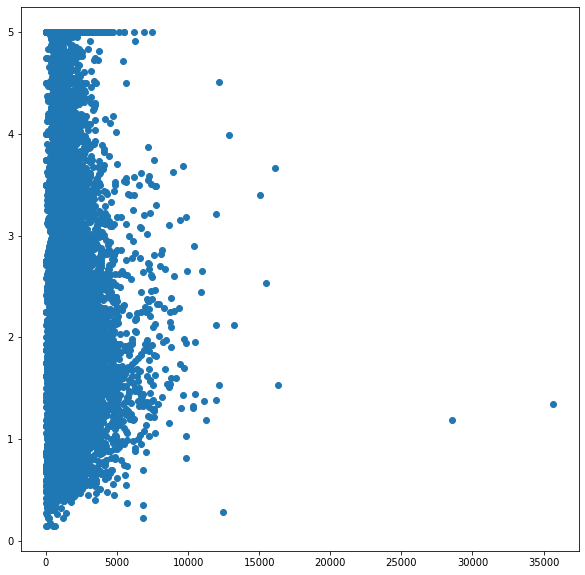

slope is -2.51175277461507e-05                       intercept is 2.1043626207627324


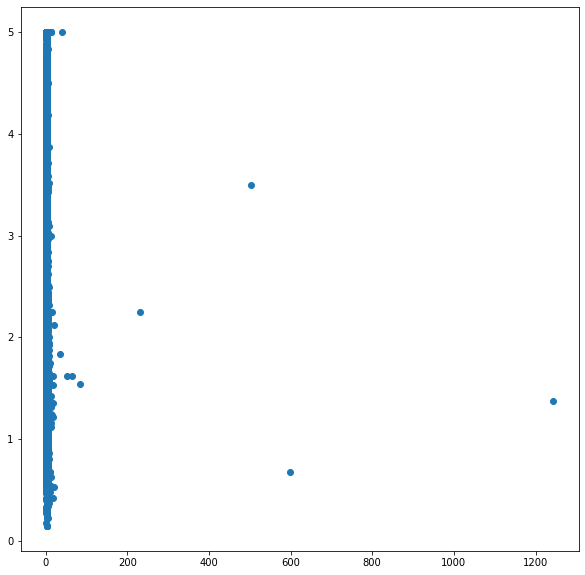

slope is -0.0026373775427609237                       intercept is 2.0766566460482077


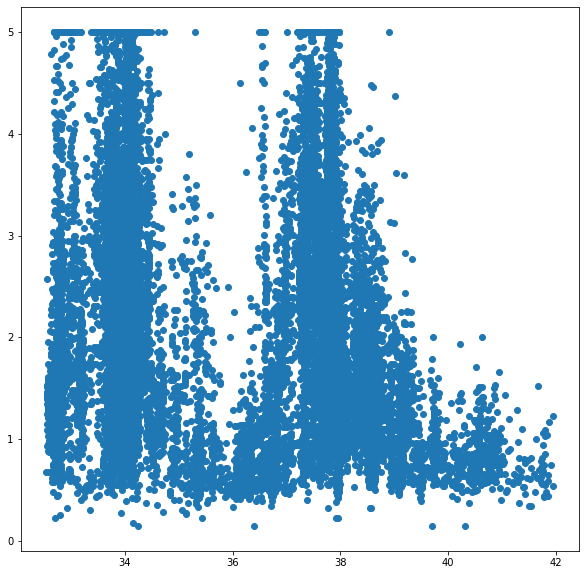

slope is -0.077883121151867                       intercept is 4.843678750028359


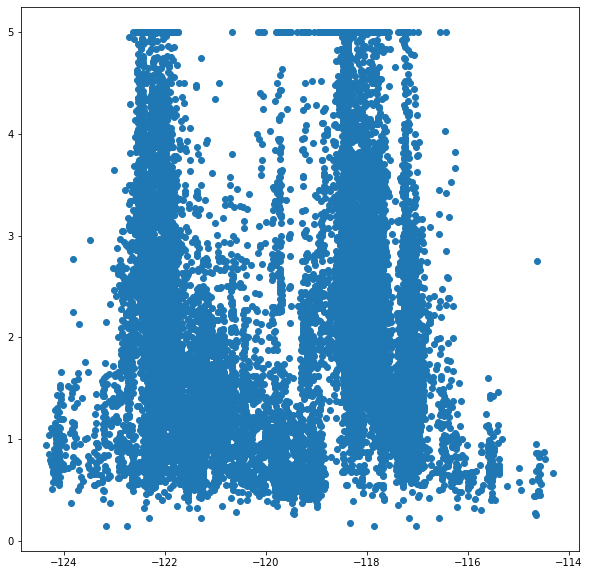

slope is -0.026474978154716607                       intercept is -1.0970471443854946


In [13]:
%pylab inline
from sklearn import linear_model
import numpy as np
from scipy import stats

X = data['data']   # 8 features (e.g. crime, # rooms, age, etc.)
Y = data['target'] # response (median house price)

for i in range(8):
    plt.figure(figsize=(10,10))
    plt.scatter(X[:,i],Y)
    plt.show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(X[:,i], Y)
    print("slope is " + str(slope) + "                       intercept is " + str(intercept))


In [14]:
print("Population is the most important feature as abs(slope) after linear regression is bigger than any other")

Population is the most important feature as abs(slope) after linear regression is bigger than any other


b) Split the data randomly into a test set and a train set. The training set should consist of 75% of all data, while the test set has the remaining 25%

In [15]:
# split the data
import math
division = math.floor(3*len(Y)/4)
train_X = X[:division]
train_Y = Y[:division]
test_X = X[division:]
test_Y = Y[division:]

c) Train a clustering algorithm as we did in class. Vary between 'uniform' and 'distance' for weights, and vary the number of nearest neighbors between 1 and 100. 

c1) For each type of weights make a plot of the Mean Squared Error as you vary the number of nearest neighbors used. Comment on the trends you see.

c2) For each type of weights make a plot of the time it takes the algorithm to train (i.e. the time the "fit" command takes) as you vary the number of nearest neighbors used.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(train_X, train_Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
    y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(train_X[:, 0], train_X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


ValueError: Unknown label type: 'continuous'

In [17]:
# many methods work better on scaled X
X_scaled = preprocessing.scale(X) 
clf1 = neighbors.KNeighborsRegressor(5)
train_X = X_scaled[:half]
test_X = X_scaled[half:]

clf1.fit(train_X,train_Y)

NameError: name 'preprocessing' is not defined

1.593235069430179


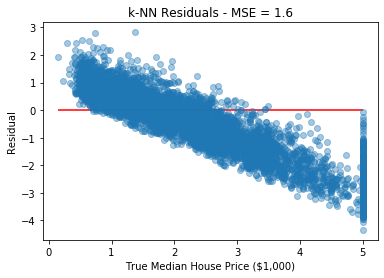

In [18]:
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

# many methods work better on scaled X

clf1 = neighbors.KNeighborsRegressor(5)

clf1.fit(train_X,train_Y)

Y_knn_pred = clf1.predict(test_X)
mse = mean_squared_error(test_Y,Y_knn_pred) ; print(mse)

f, ax = plt.subplots()
ax.plot(test_Y, Y_knn_pred - test_Y,'o',alpha=0.4)
ax.set_title("k-NN Residuals - MSE = %.1f" % mse)
ax.set_xlabel("True Median House Price ($1,000)")
ax.set_ylabel("Residual")
ax.hlines(0,min(test_Y),max(test_Y),color="red")